# Pareto decoding 

This notebook is a work in progress.

Given two edge weight functions, find all optimal decodings for linear combinations of those edge weights.  

Where do these edge functions come from?
 - two parameter vectors with shared linear features; Pareto decoding can be used to do exact and efficient line search.

In [2]:
import numpy as np
import pylab as pl

from arsenal.integerizer import FeatureHashing
from arsenal.maths import spherical

from hypergraphs.semirings import LazySort, ConvexHull, Point, post_process
from hypergraphs.apps.parser2 import parse, load_grammar

In [41]:
def binary_features(_,X,Y,Z,i,j,k):
    return alphabet(['%s -> %s %s [%s,%s,%s]' % (X,Y,Z,i,j,k)])

def unary_features(_,X,Y,i,k):
    return alphabet(['%s -> %s [%s,%s]' % (X,Y,i,k)])


def binary(sentence,X,Y,Z,i,j,k):
    fs = binary_features(sentence,X,Y,Z,i,j,k)
    return ConvexHull([Point(w1[fs].sum(), w2[fs].sum(), X)])

def unary(sentence,X,Y,i,k):
    fs = unary_features(sentence,X,Y,i,k)
    return ConvexHull([Point(w1[fs].sum(), w2[fs].sum(), X)])

def terminal(sentence,W,i):
    # semiring one with terminal symbol annotation
    return ConvexHull([Point(0, 0, W)])


zero = ConvexHull([])

bits = 8
D = 2**bits

alphabet = FeatureHashing(lambda x: abs(hash(x)), bits)
w1 = spherical(D)
w2 = spherical(D)

sentence = 'Papa ate the caviar with the spoon .'.split()

grammar = load_grammar("""
S       X .
X       X X
X       Papa
X       ate
X       the
X       caviar
X       with
X       spoon
X       in
X       park
""")

root = parse(sentence, grammar, binary, unary, terminal, zero)[0,len(sentence),'S']

Below, we plot the convex hull found.  The x-axis and y-axis are the scores under the different weight vectors.

- *TODO*: label the axes.

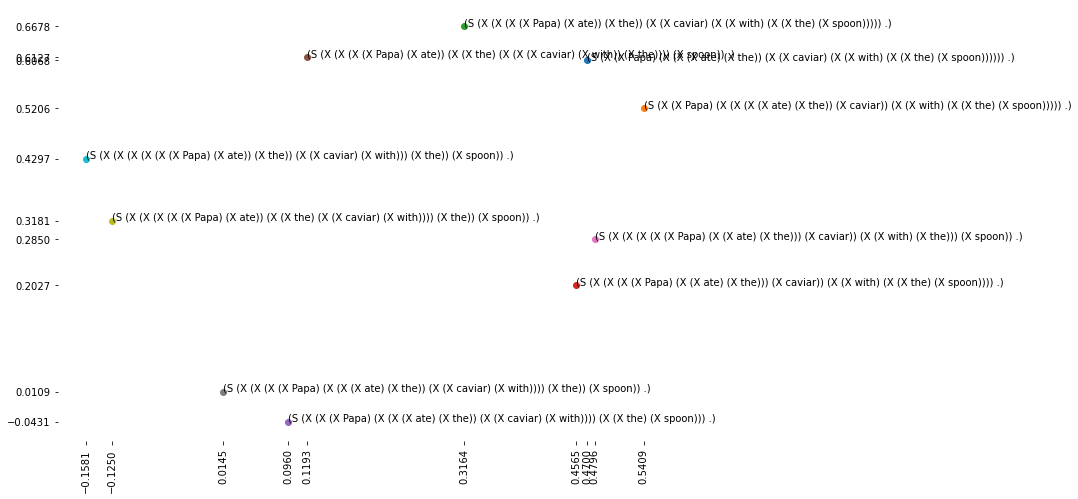

In [42]:
import re
ax = pl.figure(figsize=(11,8)).add_subplot(111)
pl.box(False)
pl.xticks([x.m for x in root], rotation='vertical')
pl.yticks([x.b for x in root])
for x in root:
    pl.scatter(x.m, x.b)
    pl.text(x=x.m, y=x.b, s=re.sub('\s+', ' ', str(x.derivation())))

**TODO**

- Explain what Pareto decoding is (i.e., decoding under all combinations of two edge scoring functions); 
  - unit-test that the interpretation is correct.
- Clean up the creation of the hypergraph and the scoring
- Visualize *every* parse in the two-dimensional plot and show that we are only selecting the one on the convex hull.  This is the main different between `ConvexHull` (polytime) and `LazySort` (exptime).
- Give references to Dyer's tutorial, Och's MERT paper, as well as work in multi-objective RL